In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

#Rheina Fairuz_kelompok 10_SI4706_102022300207_tubesdwbi


In [ ]:


fact = pd.read_csv("fact_sales.csv")
dim_customer = pd.read_csv("dim_customer.csv")
dim_time = pd.read_csv("dim_time.csv")

fact.head()



,FactSalesID,TimeID,CustomerID,ProductID,SellerID,Quantity,Revenue
0,1,1,1,1,1,1,58.90
1,2,1,1,1,1,1,239.90
2,3,1,1,1,1,1,199.00
3,4,1,1,1,1,1,12.99
4,5,1,1,1,1,1,199.90


In [18]:
#UNTUK JOIN DATA
data = fact.merge(dim_customer, on="CustomerID", how="left") \
           .merge(dim_time, on="TimeID", how="left")

data.head()



,FactSalesID,TimeID,CustomerID,ProductID,SellerID,Quantity,Revenue,CustomerUniqueID,City,State,FullDate,Year,Quarter,Month,MonthName,Day
0,1,1,1,1,1,1,58.90,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,2017-10-02,2017,4,10,October,2
1,2,1,1,1,1,1,239.90,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,2017-10-02,2017,4,10,October,2
2,3,1,1,1,1,1,199.00,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,2017-10-02,2017,4,10,October,2
3,4,1,1,1,1,1,12.99,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,2017-10-02,2017,4,10,October,2
4,5,1,1,1,1,1,199.90,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,2017-10-02,2017,4,10,October,2


In [6]:
#total revenue
total_revenue = data["Revenue"].sum()
total_revenue


np.float64(13591643.7)

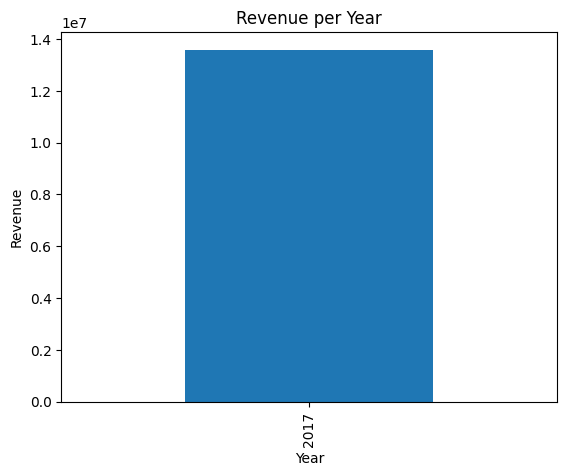

In [7]:
#revenue per tahun
revenue_year = data.groupby("Year")["Revenue"].sum()

revenue_year.plot(kind="bar", title="Revenue per Year")
plt.ylabel("Revenue")
plt.show()


In [9]:
#customer-segmentation
#RFM-Like simple
customer_agg = data.groupby("CustomerID").agg({
    "Revenue": "sum",
    "FactSalesID": "count"
}).rename(columns={"FactSalesID": "Frequency"})

customer_agg.head()


,Revenue,Frequency
CustomerID,,
1,13591643.7,112650


In [10]:
#standardisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_agg)


In [17]:
#k-means clustering
n_cluster = min(3, len(customer_agg))

kmeans = KMeans(n_clusters=n_cluster, random_state=42)
customer_agg["Cluster"] = kmeans.fit_predict(scaled_data)
customer_agg.head()





,Revenue,Frequency,Cluster
CustomerID,,,
1,13591643.7,112650,0


In [ ]:
#agregasi k-means 
customer_cluster = data.groupby("CustomerID").agg({
    "FactSalesID": "count",
    "Revenue": "sum"
}).reset_index()

customer_cluster.columns = ["CustomerID", "Frequency", "Monetary"]
customer_cluster.head()


,CustomerID,Frequency,Monetary
0,1,112650,13591643.7


In [20]:
#normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(
    customer_cluster[["Frequency", "Monetary"]]
)


In [22]:
#k-means clustering
n_cluster = min(3, len(customer_cluster))

kmeans = KMeans(n_clusters=n_cluster, random_state=42)
customer_cluster["Cluster"] = kmeans.fit_predict(scaled_data)

customer_cluster.head()



,CustomerID,Frequency,Monetary,Cluster
0,1,112650,13591643.7,0


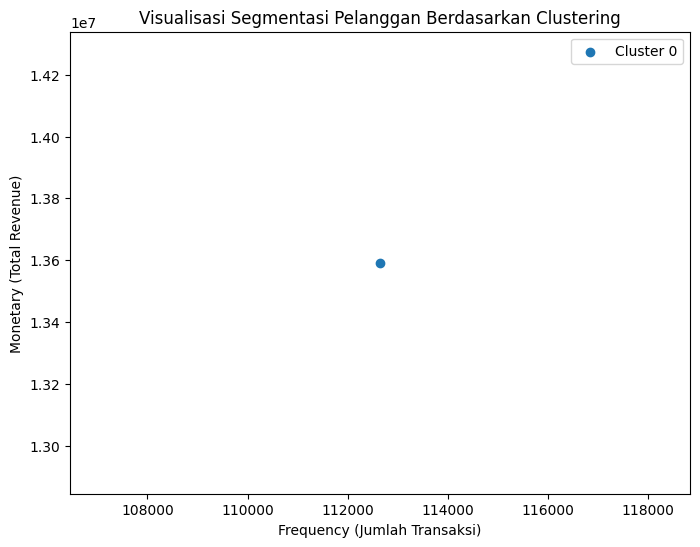

In [24]:
#visualisasi
plt.figure(figsize=(8,6))

for cluster in customer_cluster["Cluster"].unique():
    subset = customer_cluster[customer_cluster["Cluster"] == cluster]
    plt.scatter(
        subset["Frequency"],
        subset["Monetary"],
        label=f"Cluster {cluster}"
    )

plt.xlabel("Frequency (Jumlah Transaksi)")
plt.ylabel("Monetary (Total Revenue)")
plt.title("Visualisasi Segmentasi Pelanggan Berdasarkan Clustering")
plt.legend()
plt.show()



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
fact_sales = pd.read_csv("fact_sales.csv")
fact_sales.head()

,FactSalesID,TimeID,CustomerID,ProductID,SellerID,Quantity,Revenue
0,1,1,1,1,1,1,58.90
1,2,1,1,1,1,1,239.90
2,3,1,1,1,1,1,199.00
3,4,1,1,1,1,1,12.99
4,5,1,1,1,1,1,199.90


In [ ]:
#linear regression
X = fact_sales[['Quantity']]
y = fact_sales['Revenue']

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
#training model
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
#prediksi
y_pred = model.predict(X_test)


In [32]:
#evaluasi
print("R2 Score :", r2_score(y_test, y_pred))
print("MSE      :", mean_squared_error(y_test, y_pred))


R2 Score : -7.087688156381944e-07
MSE      : 36233.06011316721


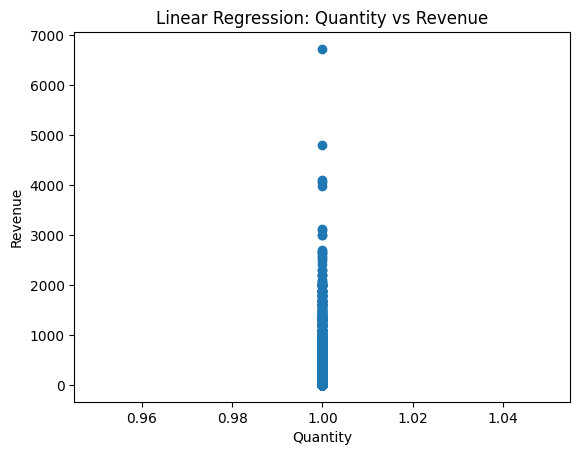

In [33]:
#visualisasi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.title("Linear Regression: Quantity vs Revenue")
plt.show()
